# Anime recommendation system

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [81]:
data=pd.read_csv("D:/Assignments/Recommendation System/Recommendation System/anime.csv")
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [82]:
data.shape

(12294, 7)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [84]:
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

# Drop null values since they are very less

In [86]:
data.dropna(inplace=True)

In [87]:
data.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

# checking for duplicate values

In [89]:
data.duplicated().sum()

0

# there are no duplicate values

In [91]:
data.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [92]:
data.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

# EDA

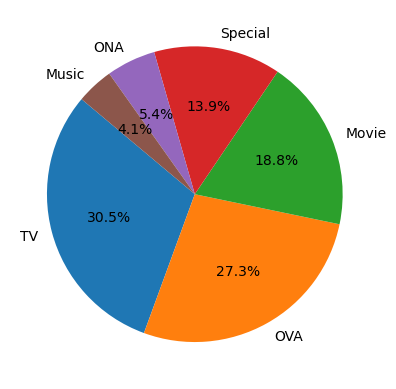

In [94]:
b=data['type'].value_counts()
b
labels = ['TV', 'OVA', 'Movie', 'Special','ONA','Music']
plt.pie(b, labels=labels, autopct='%1.1f%%', startangle=140)
# checking for different genre
data['genre'] = data['genre'].apply(lambda x: ', '.join(x).split(', '))

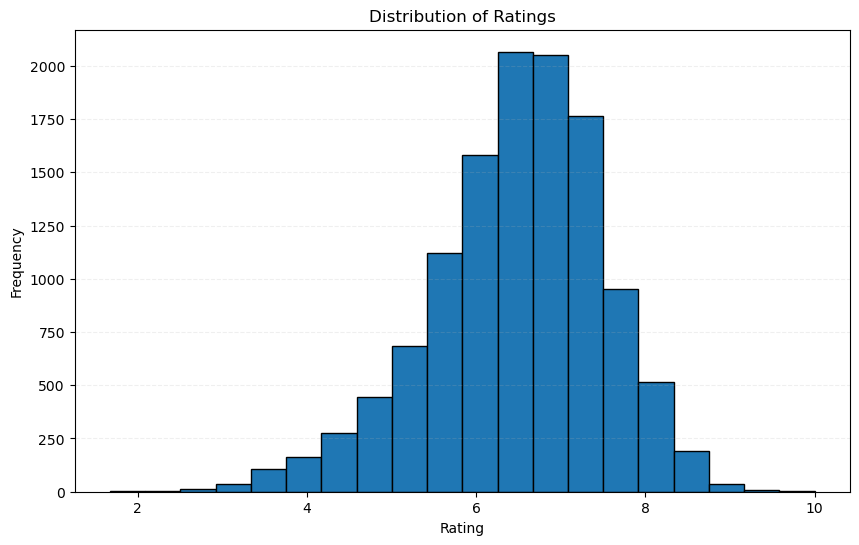

In [95]:
plt.figure(figsize=(10, 6))
plt.hist(data['rating'], bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y',alpha = 0.2 , linestyle="--") 
#linestyle is type of line
#alpha is the opacity of the grid
plt.show()

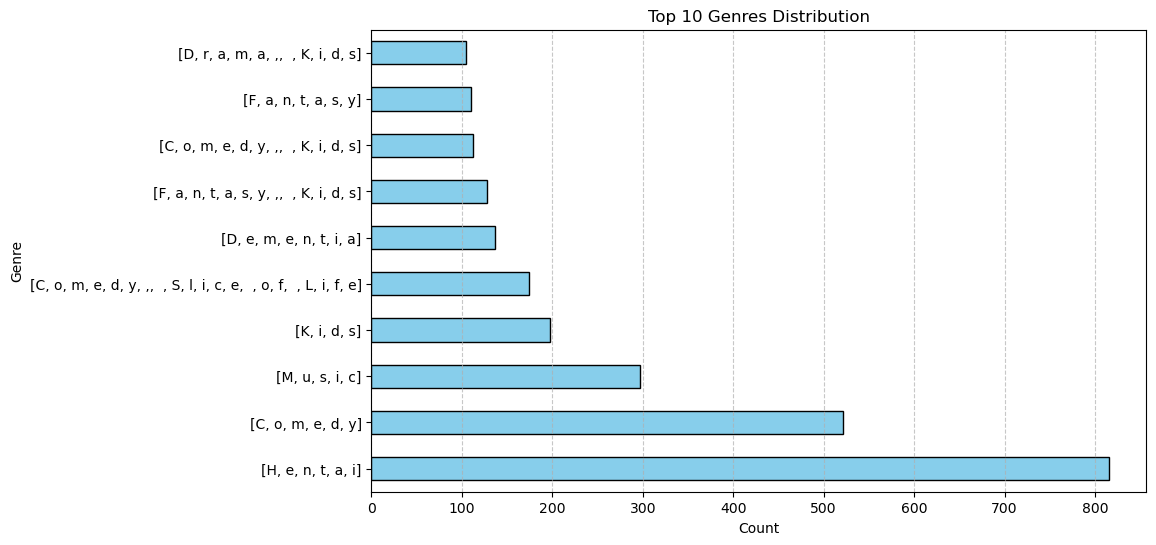

In [96]:
top_genres = data['genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [97]:
### finding out different genres in the data
data['genre']
exploded_series = data['genre'].explode()
unique_elements = exploded_series.unique()
print(unique_elements)

['D' 'r' 'a' 'm' ',' ' ' 'R' 'o' 'n' 'c' 'e' 'S' 'h' 'l' 'u' 'p' 't' 'A'
 'i' 'd' 'v' 'F' 's' 'y' 'M' 'g' 'C' 'H' 'P' '-' 'T' 'w' 'f' 'L' 'V' 'j'
 'E' 'J' 'G' 'K' 'Y']


In [99]:
anime_data = pd.read_csv("D:/Assignments/Recommendation System/Recommendation System/anime.csv")
anime_data['genre'] = anime_data['genre'].fillna('')
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


# Building a recommendation system with cosine similarity 

In [101]:
# Create a binary genre matrix
genres = set(genre for sublist in anime_data['genre'] for genre in sublist)
for genre in genres:
    anime_data[genre] = anime_data['genre'].apply(lambda x: 1 if genre in x else 0)



 #Drop unnecessary columns
anime_data.drop(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], axis=1, inplace=True)

# Calculate cosine similarity between items (anime)
item_similarity = cosine_similarity(anime_data)

# Convert the cosine similarity matrix into a DataFrame
item_similarity_df = pd.DataFrame(item_similarity, index=anime_data.index, columns=anime_data.index)

def get_similar_anime(anime_id, top_n=5):
    # Get similarity scores for the given anime
    similar_anime = item_similarity_df.loc[anime_id].sort_values(ascending=False)[1:top_n+1]
    return similar_anime

# Example usage:
similar_anime = get_similar_anime(anime_id=60, top_n=5)
print(similar_anime)

3089    0.973329
3544    0.973329
4418    0.973329
5805    0.971825
0       0.971825
Name: 60, dtype: float64


In [131]:
# Converting categorical features "genre" into numerical representations using One-hot encode

genres = data['genre'].str.get_dummies(sep=', ')
df_numerical = pd.concat([data.drop('genre', axis=1), genres], axis=1)

In [133]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['rating', 'members']
df_numerical[numerical_cols] = scaler.fit_transform(df_numerical[numerical_cols])

df_numerical.head()

,anime_id,name,type,episodes,rating,members,' ',"','",'-','A',...,['H',['J',['K',['M',['P',['R',['S',['T',['V',['Y'
0,32281,Kimi no Na wa.,Movie,1,2.824474,3.292044,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.717032,14.002410,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.707265,1.732216,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.629126,11.833499,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,2.619358,2.400518,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


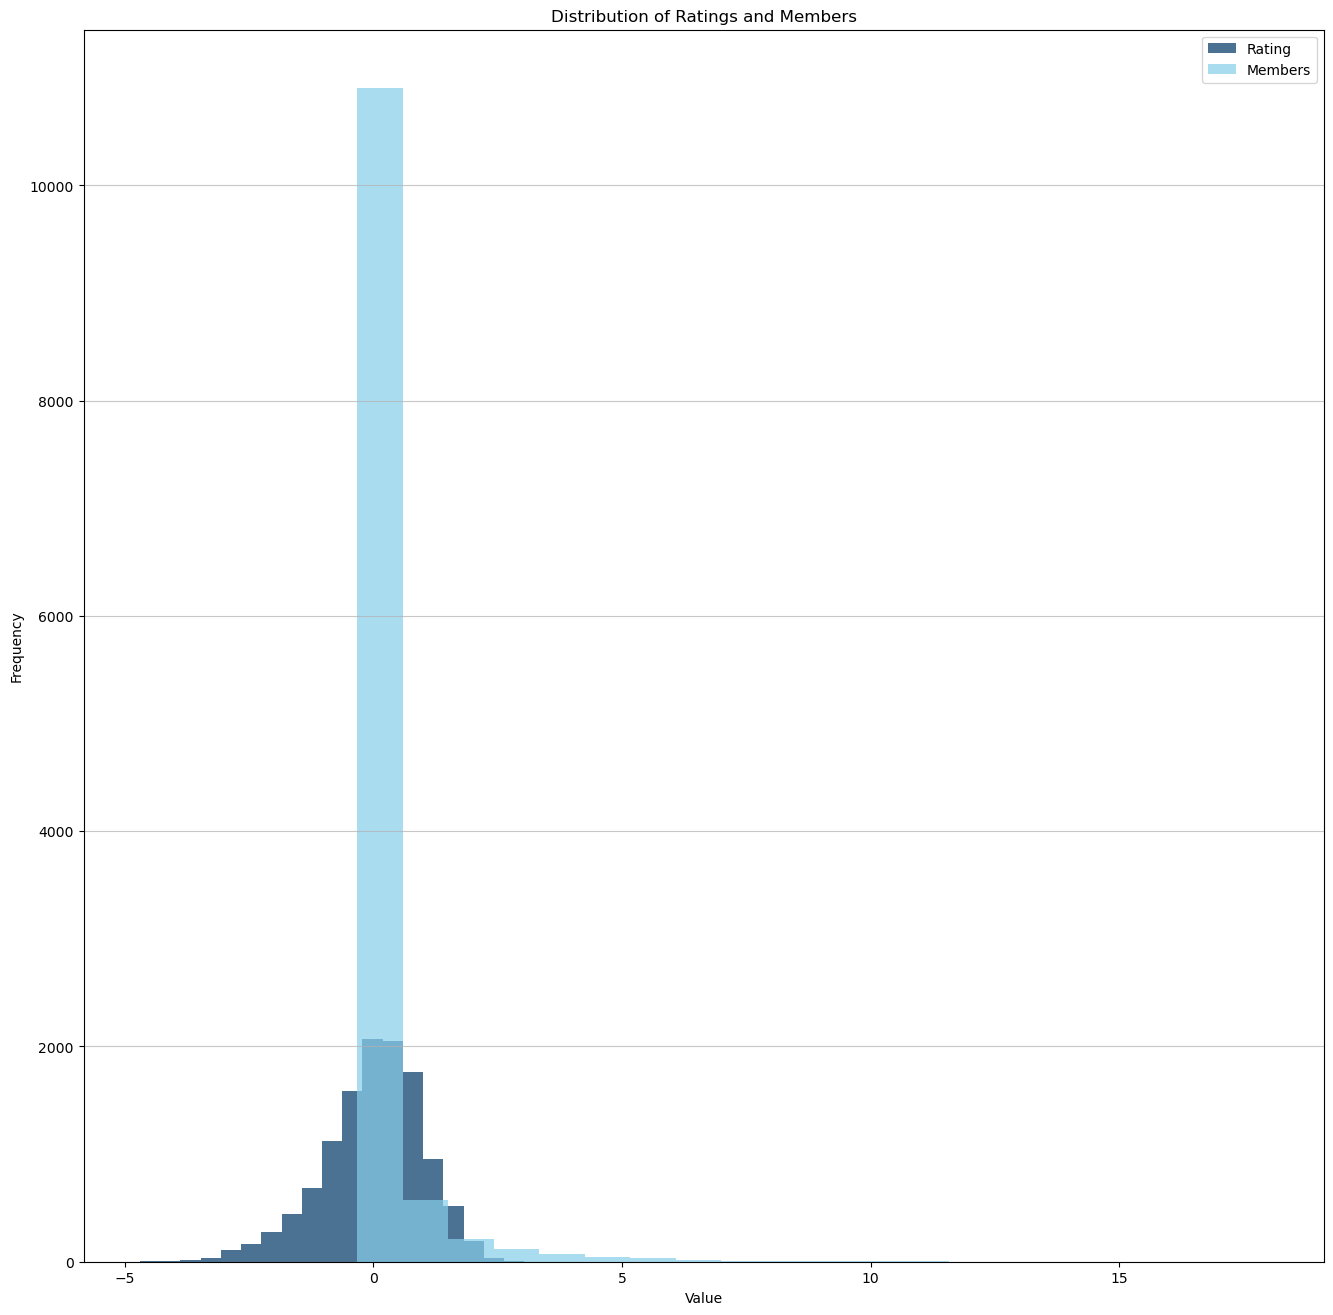

In [139]:

plt.figure(figsize=(16, 16))

# Distribution of Ratings
plt.hist(df_numerical['rating'], bins=20, color='#003666', alpha=0.7, label='Rating')

# Distribution of Members
plt.hist(df_numerical['members'], bins=20, color='skyblue', alpha=0.7, label='Members')

plt.title('Distribution of Ratings and Members')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.7)
plt.show()

In [143]:
from sklearn.metrics.pairwise import cosine_similarity


def recommend_similar_anime(data, target_anime, threshold=0.5):
    data['episodes'] = pd.to_numeric(data['episodes'], errors='coerce')
    data = data.dropna(subset=['episodes'])

    # Extract features for similarity computation
    features = data.drop(['name', 'type'], axis=1)
    
    # Find the target anime's features
    target_row = features[data['name'] == target_anime]
    
    if target_row.empty:
        return f"Anime '{target_anime}' not found in the dataset."
    
    similarities = cosine_similarity(target_row, features).flatten()
    

    similar_indices = np.where((similarities > threshold) & (data['name'] != target_anime))[0] #get index of similar anime leaving the target anime
    
    recommended_anime = data.iloc[similar_indices]['name'].tolist() #return list of recommended animes
    
    return recommended_anime

In [145]:

recommendations = recommend_similar_anime(df_numerical, 'Nana', threshold=0.5)
recommendations_series = pd.Series(recommendations)
top_5_recommendations = recommendations_series.value_counts().head(5)
print(top_5_recommendations)

Saru Kani Gassen           2
Shi Wan Ge Leng Xiaohua    2
Kimi no Na wa.             1
Rebirth Moon Divergence    1
Idol Fight Suchie-Pai 2    1
Name: count, dtype: int64


In [147]:

df_numerical['liked'] = ((df_numerical['rating'] >= 1)).astype(int)

In [149]:

df_numerical.head()

,anime_id,name,type,episodes,rating,members,' ',"','",'-','A',...,['J',['K',['M',['P',['R',['S',['T',['V',['Y',liked
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [151]:

df_numerical.isnull().sum()

anime_id      0
name          0
type          0
episodes    187
rating        0
           ... 
['S'          0
['T'          0
['V'          0
['Y'          0
liked         0
Length: 75, dtype: int64

In [153]:

df1=df_numerical.dropna()

In [155]:

df1.isnull().sum()

anime_id    0
name        0
type        0
episodes    0
rating      0
           ..
['S'        0
['T'        0
['V'        0
['Y'        0
liked       0
Length: 75, dtype: int64

In [157]:

df1.describe()

,anime_id,episodes,rating,members,' ',"','",'-','A','C','D',...,['J',['K',['M',['P',['R',['S',['T',['V',['Y',liked
count,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,...,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000
mean,13404.150211,12.486729,0.006197,0.002928,0.780304,0.772105,0.171429,0.100169,0.122316,0.101775,...,0.000254,0.032037,0.055621,0.003212,0.007777,0.029670,0.000085,0.000085,0.000169,0.142604
std,11110.087616,47.097131,0.995442,1.000023,0.414058,0.419492,0.376899,0.300238,0.327664,0.302365,...,0.015923,0.176106,0.229199,0.056587,0.087847,0.169683,0.009194,0.009194,0.013002,0.349683
min,1.000000,1.000000,-4.696423,-0.331169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3326.250000,1.000000,-0.572139,-0.327191,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9820.500000,2.000000,0.089602,-0.302679,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23302.500000,12.000000,0.695181,-0.153817,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34519.000000,1818.000000,3.439820,17.980218,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
print(df1['liked'].value_counts())

liked
0    10143
1     1687
Name: count, dtype: int64


In [161]:

# spilitting data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df1.drop(['name', 'type','anime_id'], axis=1)
y = df1['liked']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9464, 72)
Shape of X_test: (2366, 72)
Shape of y_train: (9464,)
Shape of y_test: (2366,)


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [163]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# An accuracy score of 1.0 indicates that the model achieved perfect accuracy on the testing data

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


# Interview Questions:

# 1. Can you explain the difference between user-based and item-based collaborative filtering?
+ User-Based Collaborative Filtering: User-based collaborative filtering makes recommendations by finding users similar to the target user and recommending items that those similar users have like.

+ Item-Based Collaborative Filtering Item-based collaborative filtering makes recommendations by finding items similar to the ones the target user has interacted with and recommending those similar items.

# 2. What is collaborative filtering, and how does it work? 
+ Collaborative filtering is a technique used in recommendation systems to predict a user's preferences based on the preferences of other users. The core idea is that users who have agreed in the past will agree in the future, and items that have similar appeal to users will continue to have similar appeal.